lista 04 MCMC
===
**Thiago da Mota Souza - thiagosz@cos.ufrj.br**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from scipy.sparse import coo_matrix
import math
from numpy import linalg as la
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

## Questão 1

### Questão 1.1

Pelo enunciado, o caixa tem dois possíveis estados: com cliente, 1, e sem cliente, 0. Portanto podemos modelar o problema usando a cadeia de Markov On-Off com probabilidade p de trânsição de Off para On e q de On para Off.

$$
p(t) = p(t-1)T = p(t-1) \begin{bmatrix}
(1-p) & p \\
q & (1-q)
\end{bmatrix}
$$

### Questão 1.2

O Estado estacionário da cadeia é dado por pelo auto-valor 1:

$$
\pi(T - I) = \begin{bmatrix} \pi_0 & \pi_1 \end{bmatrix} \begin{bmatrix}
(1-p) - 1 & p \\
q & (1-q) - 1
\end{bmatrix} = \begin{bmatrix}
0 & 0
\end{bmatrix} = \begin{bmatrix}
-p\pi_0 + q\pi_1 & p\pi_0 - q\pi_1
\end{bmatrix} 
$$

logo temos as que:

$$
\begin{split}
-p\pi_0 + q\pi_1 = 0 \\
\pi_0 + \pi_1 = 1
\end{split} \implies \pi = \begin{bmatrix} \frac{q}{p+q} & \frac{p}{p+q} \end{bmatrix}
$$

A restrição importa a questão $p < q$ restringe os valores dos possíveis estados estacionários

### Questão 1.3

O tempo em que o caixa fica ocioso é dado pelo tempo em que passa no estado 0. Sabemos que, uma vez que o sistema tenha atingido o estado estacionário, o tempo médio, medido em transições, que a rede leva para que seu estado saia de um estado $s_0$ e retorne a ele é dado por:

$$
\tau_{s_0} = \frac{1}{\pi_{s_0}}
$$

logo, no caso da rede on-off:

$$
\tau_{0} = \frac{p+q}{q}, \tau_{1} = \frac{p+q}{p}
$$

Logo o tempo médio que a cadeia passa no estado 0, sem cliente, é dado por $\tau_1$ que o tempo médio que a cadeia demora a voltar ao estado 1, com cliente, em trânsições discretas. Isso significa que

$$
\textit{frac. de tempo do caixa ocioso} = \frac{\tau_1}{\tau_1 + \tau_0} = \frac{q}{p+q}
$$

## Questão 2

### Questão 2.1

O andarilho criado transita entre os vértices i e j com probabilidade:

$$
p_{i,j} = \frac{w_{i,j}}{\sum_{k \in V}w_{i,k}}
$$

Onde atribui-se $w_{i,j} = 0$ se j não há uma aresta incidente em i originada em j. Logo:

$$
\sum_{j \in V}p_{i,j} = \sum_{j \in V}\frac{w_{i,j}}{\sum_{k \in V}w_{i,k}} = 1, \forall i \in V
$$

Já que foi restrito pelo enunciado que os pesos são positivos, a equação anterior significa que as probabilidades de transição de um vértice para outro respeitam as restrições impostas as probabilidades.

### Questão 2.2

Induzido pelo andarilho não-enviesado, acredito que no estado estacionário a probabilidade do andarilho estar no vértice j é proporcional a soma dos pesos das arestas incidentes a j de forma que:


$$
\pi_{chute}(k) = \frac{\sum_{j}w_{j,k}}{\sum_{m}\sum_{n}w_{m,n}}
$$

Para simplificar as equações: $S_W = \sum_{j}\sum_{k}w_{j,k}$ e $S_j = \sum_{k}w_{j,k}$.

Segue uma verificação do chute:

$$
\pi_{chute}\boldsymbol{P} = \pi_{chute}\begin{bmatrix} \boldsymbol{p_1} \\ \boldsymbol{p_2} \\ \vdots \\ \boldsymbol{p_n} \end{bmatrix} = \sum_{i}\pi_{chute}(i)\boldsymbol{p_i}
$$

Onde $p_i$ é a i-ésima linha de P. O que podemos desenvolver em:


$$
\pi_{chute}P(k) = \sum_{i}\pi_{chute}(i)p_{i,k} = \sum_{i}\frac{\sum_{j}w_{j,i}}{\sum_{m}\sum_{n}w_{m,n}}p_{i,k} = \frac{1}{\sum_{m}\sum_{n}w_{m,n}}\sum_i\sum_jw_{j,i}p_{i,k} = \frac{1}{\sum_{m}\sum_{n}w_{m,n}}\sum_ip_{i,k}\sum_jw_{j,i}
$$

usando a definção de $p_{i,k}$ na equação anterior e sendo a rede não-direcionada, $w_{i,j} = w_{j,i} \implies \sum_iw_{i,j} = \sum_iw_{j,i}$:

$$
\pi_{chute}P(k) = \frac{1}{\sum_{m}\sum_{n}w_{m,n}}\sum_i\frac{w_{i,k}}{\sum_lw_{i,l}}\sum_jw_{j,i} = \frac{1}{\sum_{m}\sum_{n}w_{m,n}}\sum_iw_{i,k} = \pi_{chute}(k)
$$

Logo o chute está correto e podemos afirmar que:

$$
\pi(k) = \frac{\sum_{j}w_{j,k}}{\sum_{m}\sum_{n}w_{m,n}}
$$


## Questão 2.3

Usando a simetria da rede $w_{i,j} = w_{j,i} \implies \sum_iw_{i,j} = \sum_iw_{j,i}$

$$
\pi_ip_{i,j} = \frac{\sum_{j}w_{j,i}}{\sum_{m}\sum_{n}w_{m,n}}p_{i,j} = \frac{\sum_{j}w_{j,i}}{\sum_{m}\sum_{n}w_{m,n}}\frac{w_{i,j}}{\sum_{k \in V}w_{i,k}} = \frac{\sum_{j}w_{i,j}}{\sum_{m}\sum_{n}w_{m,n}}\frac{w_{j,i}}{\sum_{k \in V}w_{i,k}} = \frac{w_{j,i}}{\sum_{m}\sum_{n}w_{m,n}} = \frac{\sum_{i}w_{i, j}}{\sum_{m}\sum_{n}w_{m,n}}\frac{w_{j,i}}{\sum_{i}w_{j,i}} - \pi_j P_{j,i}
$$

## Questão 3

### Questão 3.1

#### Grafo em Anel

$$
p_{i,j} = \begin{cases} 1/2, i=j \\ 1/4, j \in \{(j+1 \mod n), (j-1 \mod n)\} \\ 0, \text{outros casos} \end{cases}
$$

#### Grafo em Árvore Compĺeta

Considerando que os vértices serão rotulados usando um algoritmo de visitação esquerda-direita-raiz:

In [3]:
class Tree:
    left = None
    right = None
    def __init__(self, data=None, height=0):
        self.data = data
        if height > 0:
            self.left = Tree(data, height-1)
            self.right = Tree(data, height-1)

In [4]:
def tree_collect_fun(left_result, right_result, node_result):
    out = Tree()
    out.data = node_result
    out.left = left_result
    out.right = right_result
    return out

def to_list_collect_fun(left_result, right_result, node_result):
    if not left_result:
        left_result = []
    if right_result:
        left_result.extend(right_result)
    if node_result:
        left_result.extend(node_result)
    return left_result

In [5]:
def internal_fun(**args):
    print(args)
    args["nova_par"] = True
    
def my_fun(**args):
    internal_fun(par=1.**args)
    print(args)

In [6]:
def visit_tree(tree, fun, collect_fun, **args):
    
    grandfather = args["father"]
    
    left = tree.left
    left_result = None
    if not left:
        node_result = fun.__call__(tree, **args)
        return collect_fun.__call__(None, None, node_result)
    args["father"] = tree
    left_result = visit_tree(left, fun, collect_fun, **args)
    
    right = tree.right
    right_result = None
    if right:
        right_result = visit_tree(right, fun, collect_fun, **args)
    
    args["father"] = grandfather
    node_data = tree.data
    node_result = fun.__call__(tree,**args)

    return collect_fun.__call__(left_result, right_result, node_result)

In [7]:
def dir_call(tree, fun, **args):
    node_data = tree.data
    return fun(node_data, **args)

In [8]:
def assign_index(node, **kwargs):
    kwargs["last_index"][0] = kwargs["last_index"][0] + 1
    return kwargs["last_index"][0]

In [9]:
# tree = Tree(height=2)

In [10]:
# li=[-1]
# index_tree = visit_tree(tree, assign_index, tree_collect_fun, father=None, last_index=li)

Usando o mesmo algoritmo de visitação podemos escrever uma função que lista os ramos do grafo

In [11]:
def get_graph_branches(node, **kwargs):
    """Função que lista as transições de um grafo"""
    out = []
    if node.left:
        left_branch = (node.left.data, node.data)
        out.append(left_branch)
    if node.right:
        right_branch = (node.right.data, node.data)
        out.append(right_branch)
    return out

In [12]:
# branches_list = visit_tree(index_tree, get_graph_branches, to_list_collect_fun, father=None)

Para essa forma de indexar, esquerda-direita-raiz, com o primieiro ínidice em 0, se um nó de ínidice i está na altura h da árvore:

* seu filho direito tem ínidice $i_{direito} = i-1$
* seu filho esquerdo tem índice $i_{esquerdo} = i-2^h$, se
* o nó mais alto da árvore tem índice $i_{max} = 2^{h_{max}} - 2$
* o nó pai de um nó é tem índice $i_{pai} = \begin{cases} 
i + 1 & \text{se i filho direito} \\
i + 2^{h+1} & \text{se i filho esquerdo}
\end{cases}$, i é filho esquerdo caso $i < \frac{2^{h+2}-1}{2}$ e direito em caso contrário.
* $0 < i < i_{max} \forall i$


com isso podemos escrever a a matriz de transições analiticamente usando como vizinhança, V do nó seus filhos e seu pai, se existirem:

$$
p_{i,j} = \begin{cases}
1/2 & i = j \\
\frac{1}{2|V|} & j \in V \\
0 & \text{outro caso}
\end{cases}
$$

#### Grafo em Reticulado

No reticulado:

$$
i_{no} = j + i\sqrt(n)
$$

se o ponto está n j-ésima coluna e i-ésima linha do grafo, $0 \leq i,j \leq \sqrt(n)-1$. cada nó tem vizinhaça dada pelos pontos:

* anterior na linha: $ j-1 + i\sqrt{n}, \text{ se } 1 < j < (\sqrt{n} - 2)$
* posterior na linha: $ j+1 + i\sqrt{n}, \text{ se } 1 < j < (\sqrt{n} - 2)$
* anteiror na coluna: $ j + (i-1)\sqrt{n}, \text{ se } 1 < i < (\sqrt{n} - 2)$
* posterior na coluna: $ j + (i+1)\sqrt{n}, \text{ se } 1 < i < (\sqrt{n} - 2)$


Assim podemos construir uma matriz de transição do nó i para o j:

$$
p_{i,j} = \begin{cases}
1/2 & i = j \\
\frac{1}{8} & j \in V
0 & \text{outro caso}
\end{cases}
$$

### Questão 3.2

Pode-se utilizar o resultado obtido na questão 2 par calcular o valor analítico do estado estacionário dos passeios no acima.

#### Grafo em Anel

È simético então o estado estacionário tem probabilidade uniforme para todos os estados.

#### Grafo em Árvore completa:

$$
\pi_i = \begin{cases}
\alpha 4 & \text{i sem pai} \\
\alpha 6 & \text{i tem pai e filhos} \\
\alpha 2 & \text{i sem filhos}
\end{cases}
$$

$\alpha$ e um fator de normalização tal que $\sum_i\pi_i = 1$, sabendo que existem:

* 1 nó sem pai no grafo
* $2^{h_{max}}$ nós sem flho no grafo
* os demais tem pai e filhos
* $h_{max} = log_2(n+1) - 1 $


logo

$$
\sum_i\pi_i 1 = \alpha\left(4 + 2\frac{(n+1)}{2} + 6(n - \frac{(n+1)}{2} - 1)\right), n > 3 \implies \alpha = \frac{1}{4(n-1)}, n > 3
$$

os casos n=3  e n=1 são simples e tem estado estacionário, respectivamente $\pi = \begin{bmatrix} 1/4 & 1/4 & 1/2\end{bmatrix}$ e $\pi = \begin{bmatrix} 1 \end{bmatrix}$ 

#### Grafo em reticulado

no caso do reticulado:


$$
\pi_i = \begin{cases}
\alpha 4 & \text{i na borda do reticulado} \\
\alpha 8 & \text{outro caso} \\
\end{cases}
$$

Novamente $\alpha$ normaliza $\pi$

$$
\sum_i\pi_i 1 = \alpha\left(4(4\sqrt{n}) + 8(n - 4\sqrt{n}) \right), n > 4 \implies \alpha = \frac{1}{8\left(n-2\sqrt{n}\right)}
$$

Os casos n=4 e n=1 são triviais pois todos os pontos estão na borda e portanto a rede é simétrica e a distribuição no estado estacionário da rede é uniforme

### Questão 3.3

In [13]:
def mae(x, x_true):
    return mean_absolute_error(x, x_true)

In [14]:
def pi_sample_mean(states_paths):
    return np.mean(states_paths, axis=0)

In [15]:
N = 100

In [16]:
def get_ring_transition_matrix(num_vertices):
    row = []
    col = []
    data = []
    for i in range(num_vertices):
        row.extend([i, i, i])
        col.extend([i, (i-1) % num_vertices, (i+1) % num_vertices])
        data.extend([.5, .25, .25])
    return coo_matrix((data, (row, col)), shape=(num_vertices,num_vertices))

In [17]:
def get_tree_graph_transition_matrix_coor_for_node(node, **kwargs):
    """Função que lista as transições de um nó do grafo em árvore para seus vizinhos"""
    row = []
    col = []
    p = []
    
    if kwargs["father"]:
        row = [node.data]
        col = [kwargs["father"].data]
        p.append(1)
        
    if node.left and node.right:
        row.extend([node.data, node.data])
        col.extend([node.left.data, node.right.data])
        p.extend([1,1])
    
    row.extend([node.data])
    col.extend([node.data])
    p.append(len(p))
    
    p = np.array(p)
    p = p/p.sum()
    return p, row, col

In [18]:
def to_lists_collect_fun(left_result, right_result, node_result):
    if not left_result and not right_result:
        return node_result
        
    def concat(l, r, n):
        o = []
        o.extend(l)
        o.extend(r)
        o.extend(n)
        return o
    
    p = concat(left_result[0], right_result[0], node_result[0])
    row = concat(left_result[1], right_result[1], node_result[1])
    col = concat(left_result[2], right_result[2], node_result[2])
    return p, row, col

In [19]:
def get_tree_trasition_matrix(num_vertices):
    """Cria a matriz de transição do andarílio pedido na questão para o grafo em árvore completa"""
    tree = Tree(height=math.log(num_vertices+1,2) -1)
    li = [-1]
    index_tree = visit_tree(tree, assign_index, tree_collect_fun, last_index=li, father=None)
    p, row, col = visit_tree(index_tree, get_tree_graph_transition_matrix_coor_for_node, to_lists_collect_fun, father=None)
    return coo_matrix((p, (row, col)), shape=(num_vertices,num_vertices))
    

In [20]:
def get_cartesian_transition_matrix(num_vertices):
    p  = []
    row = []
    col = []
    
    max_coor = int(math.sqrt(num_vertices))
    
    for i in range(max_coor):
        for j in range(max_coor):
            p_node = []
            row_node = []
            col_node = []
            
            if j > 1:
                p_node.append(1)
                row_node.append(j+i*max_coor)
                col_node.append(j+i*max_coor - 1)
            if j < (max_coor - 1):
                p_node.append(1)
                row_node.append(j+i*max_coor)
                col_node.append(j+i*max_coor + 1)
                
            if i > 1:
                p_node.append(1)
                row_node.append(j+i*max_coor)
                col_node.append(j+(i-1)*max_coor)
            if i < (max_coor - 1):
                p_node.append(1)
                row_node.append(j+i*max_coor)
                col_node.append(j+(i+1)*max_coor)
            
            p_node.append(len(p_node))
            p_node = np.array(p_node)
            p_node = p_node/np.sum(p_node)
            row_node.append(j+i*max_coor)
            col_node.append(j+i*max_coor)
            
            p.extend(p_node)
            row.extend(row_node)
            col.extend(col_node)
            
        
    return coo_matrix((p, (row, col)), shape=(num_vertices,num_vertices))


Apesar do enunciado ter fixado o número de vértices em 100 para todos os casos, existem restrições para esse parãmetro para o reticulado e para a árvore cheia:

* n árvore cheia: $n \in \{n \in \mathbb{Z}^+ | n = \log_2(k) - 1, k \in \mathbb{Z}^+\}$
* n reticulado: $n \in \{n | n = k^2 , k \in \mathbb{Z}\}$

No caso da árvore, vou usar o menor grafo com n > 100, logo 127

In [21]:
def theoretic_sationary_sate(M):
    return (M**1000)[0,:]

In [22]:
P_tree = get_tree_trasition_matrix(127)
pi_tree_inf = theoretic_sationary_sate(P_tree)
P_ring = get_ring_transition_matrix(100)
pi_ring_inf = theoretic_sationary_sate(P_ring)
P_ret = get_cartesian_transition_matrix(100)
pi_ret_inf = theoretic_sationary_sate(P_ret)

In [23]:
def vect_diff(x,y):
    return np.abs(x-y).sum()

In [24]:
def run_markov_chain_exp(P, t_range, pi, x_0=None):
    dim = P.shape[0]
    x = x_0
    if not x:
        x = np.zeros(dim)
        x[0] = 1
    
    dist = []
    for t in tqdm(t_range):
        x = x*P
        dist.append(vect_diff(pi, x))
    
    return dist

In [27]:
t = range(0,1000)
ring_history = run_markov_chain_exp(P_ring, t, pi_ring_inf)
tree_history = run_markov_chain_exp(P_tree, t, pi_tree_inf)
ret_history = run_markov_chain_exp(P_ret, t, pi_ret_inf)

100%|██████████| 1000/1000 [00:00<00:00, 7877.06it/s]


In [28]:
def plot_mc_history(dist_history_ring, dist_history_tree, dist_history_ret):
    plt.figure(figsize=(8, 6))
    plt.subplot(2,1,1)
    plt.plot(dist_history_ring, '-', color='blue')
    plt.plot(dist_history_tree, '-', color='black')
    plt.plot(dist_history_ret, '-', color='green')
    plt.grid(True)
    plt.xlabel('t')
    plt.legend([f"ring", "tree", "ret"])
    plt.title(f'dist para o estado estacionário')
    plt.ylabel(f'dist')
    plt.subplot(2,1,2)
    plt.plot(dist_history_ring, '-', color='blue')
    plt.plot(dist_history_tree, '-', color='black')
    plt.plot(dist_history_ret, '-', color='green')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.grid(True)
    plt.xlabel('t')
    plt.yscale('log')
    plt.legend([f"ring", "tree", "ret"])
    plt.title(f'log dist para o estado estacionário')
    plt.ylabel(f'dist')
    plt.show()

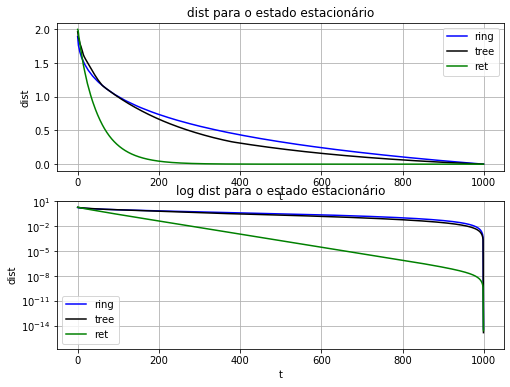

In [29]:
plot_mc_history(ring_history, tree_history, ret_history)

### Questão 3.4

O grafo em reticulado transita converge muito mais rapidamente para o estado estacionário. Seguido da árvore e do anel que não são tão diferentes assim

## Questão 4

Sabemos que o transiente é dominado pelo segundo maior autovalor $\lambda_2$. O problema é achar a constante de proporcionalidade, $C$, que rege essa convergência expoencial e depois basta resolver a equação 

$$
\tau = \log_{\lambda_2}\left(\frac{1}{C\epsilon}\right)
$$

Em sala de aula vimos inequações que dão limitantes superiores e inferiores para o tempo de mistura.

Para o caso da questão, conhecemos o estado estacionário e podemos fazer uma regressão a partir da simulação da rede e achar o parâmetro C que falta. 

In [26]:
def convergence_bound(P, pi_inf, epsilon):
    eigs = np.sort(np.abs(np.linalg.eigvals(P)))
    lambda_1 = eigs[-1]
    lambda_2 = eigs[-2]
    delta = lambda_1 - lambda_2
    pi_0 = np.sort(pi_inf)[0]
    t_min = math.log(1/(2*epsilon))/(2*delta)
    t_max = math.log(1/(pi_0*epsilon))/delta
    return t_min, t_max

In [28]:
def thoretic_pi_ring(n):
    return np.ones(n)/np.sum(n)

def theoretic_pi_tree(num_vertices):
    tree = Tree(height=math.log(num_vertices+1,2) -1)
    
    def get_node_unormalized_prob(node, **args):
        if not args["father"]:           
            return [4]
        elif (not node.left) and (not node.right):
            return [2]
        return [6]
    
    p = visit_tree(tree, get_node_unormalized_prob, to_list_collect_fun, father=None)
    p = np.array(p)
    p = p/p.sum()
    return p


def theoretic_pi_ret(n):
    dim = int(math.sqrt(n))
    p = np.zeros(n)
    for i in range(0, dim):
        for j in range(0,dim):
            if i == 0 or i == (dim-1) or j == 0 or j == (dim-1):
                p[j+i*dim] = 6
            else:
                p[j+i*dim] = 8
                
    p[0] = 4
    p[n-1] = 4
    p[dim-1] = 4
    p[n - dim + 1] = 4
    
    p = np.array(p)
    p = p/p.sum()
    return p

In [29]:
P_ring = get_ring_transition_matrix(1000)
pi_ring_inf = thoretic_pi_ring(1000)
tau_min_ring, tau_max_ring = convergence_bound(P_ring.toarray(), pi_ring_inf, 1e-4)
P_tree = theoretic_pi_tree(1023)
# p_tree_inf = theoretic_sationary_sate(1023)
# tau_min_tree, tau_max_tree = convergence_bound(P_tree.toarray(), pi_tree_inf, 1e-4)

print(f"Segundo os limitantes apresentados em sala de aulaa, {tau_min_ring} < $\\tau_ring$ < {tau_max_ring}")
# print(f"Segundo os limitantes apresentados em sala de aulaa, {tau_min_tree} < $\\tau_tree$ < {tau_max_tree}")

Segundo os limitantes apresentados em sala de aulaa, 431487.46745393064 < $\tau_ring$ < 1633109.902830743


In [30]:
def get_transient_eig(M):
    l = np.linalg.eigvals(M.toarray())
    l = np.sort(np.abs(l))
    return l[-2]

In [42]:
def run_transient_experiment_ring():
    n_range = [10,50,100,300,700,1000]
    t_range = range(0, int(2e6))
    dists_graphs = [[]]*len(n_range)
    for i,n in enumerate(n_range):
        pi_ring_inf = thoretic_pi_ring(n)
        P_ring = get_ring_transition_matrix(n)
        dist = run_markov_chain_exp(P_ring, t_range, pi_ring_inf)
        dists_graphs[i] = dist
    return np.array(dists_graphs), n_range

def run_transient_experiment_ret():
    n_range = [9,49,100,484,676,961]
    t_range = range(0, int(2e6))
    dists_graphs = [[]]*len(n_range)
    for i,n in enumerate(n_range):
        pi_ret_inf = theoretic_pi_ret(n)
        P_ret = get_cartesian_transition_matrix(n)
        dist = run_markov_chain_exp(P_ret, t_range, pi_ret_inf)
        dists_graphs[i] = dist
    return np.array(dists_graphs), n_range

def run_transient_experiment_tree():
    n_range = [15,63,127,511,1023,2047]
    t_range = range(0, int(2e6))
    dists_graphs = [[]]*len(n_range)
    for i,n in enumerate(n_range):
        P_tree = get_ring_transition_matrix(n)
        pi_tree_inf = theoretic_pi_tree(n)
        dist = run_markov_chain_exp(P_tree, t_range, pi_tree_inf)
        dists_graphs[i] = dist
    return np.array(dists_graphs), n_range

In [43]:
dists_ret, n_range_ret = run_transient_experiment_ret()

In [ ]:
dists_ring, n_range_ring = run_transient_experiment_ring()

In [127]:
dists_tree, n_range_tree = run_transient_experiment_tree()

In [49]:
def plot_transient_experiment(dists, n_range, graph_topology):
    plt.figure(figsize=(8, 6))
    legend = []
    for d, n in zip(dists, n_range):
        plt.plot(d, '-')
        legend.append(f"n={n}")
    plt.grid(True)
    plt.xlabel('t', fontsize=15)
#     plt.xscale("log")
#     plt.xlim(0,4000)
    plt.ylabel(r'dist to $\pi$', fontsize=15)
    plt.yscale("log")
    plt.legend(legend)
    plt.title(f'convergencia para grafo em {graph_topology}')

In [108]:
# P_ring = get_ring_transition_matrix(1000)
# pi_ring_inf = thoretic_pi_ring(1000)
# convergence_bound(P_ring.toarray(), pi_ring_inf, 1e-4)

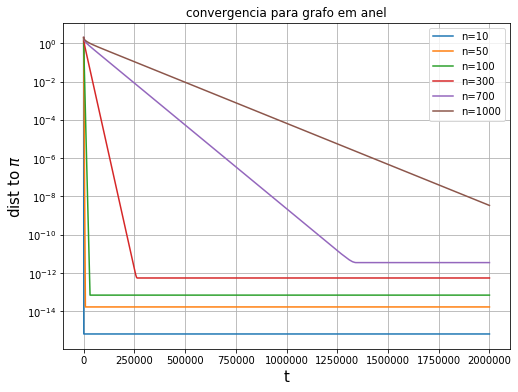

In [107]:
plot_transient_experiment(dists_ring, n_range_ring)

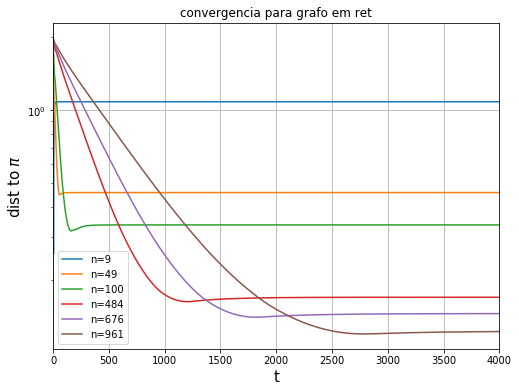

In [48]:
plot_transient_experiment(dists_ret, n_range_ret, "ret")

> **Essa gráfico mostra um fenômenos bem interssante. Nestas redes há um "overshoot"..a distância para o estado estacionario não é montônicamente decrescente, mas a serie de distâncias mostra uma oscilação**. Nâo estou certoi que isso seja característica da rede ou problema númerico


## Questão 6

### Questão 6.1

Podemos 3 nós do grafo original, caso formem um triângluo, matemos a amostra, caso contrário rejeitamos a amostra. Para garantir que a escolha dos 3 nós seja uniforme, podemos utilizar o algoritmo Knuth-shuffle; geramos uma permutação dos nós e ficamos apenas com os 3 primeiros. Muitos candidatos a triângulos serão rejeitados, uma vez que as escolhas a partir da distribuição uniforme tem "pouca chance" de realmente ger um triângulo

### Questão 6.2

Podemos induzir um andarilio sobre o grafo que transita entre vizinhos com probabilidade uniforme. Sabemos que no estado estacionário, esse andarilio visita os nós com probabilidade proporcional ao número de vizinhos, mas podemos utilizar Metropolis-Hasting para corrigir esse viés e fazer com que, no estado estacionári, cada nó seja visitado com probabilidade uniforme. Nesta nova cadeia, podemos achar os triângulos através dos caminhos amostrais. Já que cada nó foi visitado com igual probabilidade, os triângulos também serão

## Questão 6.3

Intuitivamente, parece que quanto mais conexo for o grafo, melhor o será o uso do segundo método, pois o tempo de mistura da Cadeia é menor como demonstrado na questão 3. O primeiro método deve ser melhor em grafos pouco conexos.

## Questão 7

Podemos modelo o problema como sendo um problema de otmização sobre o espaço de todas os possíveis códigos sigma:

$$
\sigma^* = \arg \max_{\sigma}f(\sigma)
$$

O código é uma permutação do alfabeto e pode ser representado como um vetor de tamabo N (número de letras no alfabeto). Para utilizar simulated annealing para este problemas, precisamos induzir uma Cadeia de Markov em que cada estado, $s$, seja uma das permutações que existem no espaço $\sigma$ e criar transiões neste espaço e escolher uma estratégia de transição que garanta que a cadeia induzida seja aperiódica e irredutível

1. Podemos representar o estado da Cadeia com vetores de tamanho N
2. Podemos transitar na cadeia criando uma nova permutação usando uma iteração do Knuth-shuffle, ou seja, escolhendo uma das posições do código atual e trocando seu conteúdo com a última posição do código.
3. Aplicamos a dostrinuição de boltzman para executar a transição

A parte talvez mais difícil desse algoritmo é gerar a função f. Talvez procurando palavras dicionarizadas no texto decodificado pudéssemos encontrar uma boa f, ou comparar as frequências das letras da mensagem decodificada com as frequências esperada das letras em uma mensagem decodificada.

In [169]:
N_alphabet = 26
def gen_code(N_alphabet=26):
    alphabet = range(0, N_alphabet)
    per = np.random.permutation(N_alphabet)
    return {k: v for k,v in zip(alphabet, per)} 

def encode_msg(code, msg):
    return [code[i] for i in msg]

def decode_msg(code, msg):
    inv_code = dict(zip(code.values(), code.keys()))
    return encode_msg(inv_code, msg)

In [140]:
unknown_code = gen_code(N_alphabet)

In [410]:
msg = np.random.randint(0,N_alphabet, 100)
encoded_msg = encode_msg(unknown_code, msg)

In [411]:
def perfect_code_evaluator(code):
    decode = decode_msg(code, encoded_msg)
    return ( decode == msg).sum()/len(msg)

In [412]:
def simulated_annealing_code_breaker(T_hist):

    def generate_next_code(c):
        p = np.random.randint(0, N_alphabet-1)
        c1 = c.copy()
        
        temp = c[p]
        c1[p] = c[N_alphabet-1]
        c1[N_alphabet-1] = temp
        
        return c1
    
    code = gen_code(N_alphabet)
    f_eval = perfect_code_evaluator(code)
    f_hist = [f_eval]

    def accept_code(f_eval1, t):
#         print(t)
#         print(f"f_eval {f_eval} t {t}")
        p_accept = min(1, math.exp(f_eval1/t)/math.exp(f_eval/t))
#         print(f"prob accept {p_accept}")
        return np.random.uniform() <= p_accept
    
    for t in T_hist:
        code1 = generate_next_code(code)
        f_eval1 = perfect_code_evaluator(code1)
#         print(f"new f_eval {f_eval1}")
        if accept_code(f_eval1, t):
            f_hist.append(f_eval1)
#             print("accept")
            f_eval = f_eval1
            code = code1
    
    return code, f_eval, f_hist
    

In [413]:
def linear_temperature():
    T_i = .1
    T_f = .5e-2
    T_vet = np.linspace(T_i, T_f, 2000)
    T_out = np.array([])
    for t in tqdm(T_vet):
        v = t*np.ones(100)
        T_out = np.concatenate((T_out, v))
    return T_out

In [414]:
T = linear_temperature()

In [415]:
code, f_val, f_hist = simulated_annealing_code_breaker(T)

In [428]:
def plot_optmization(f_hist):
    
    def movingaverage(interval, window_size):
        window = np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')
    
    plt.figure(figsize=(8, 6))
    plt.plot(f_hist, 'xb')
    plt.plot(movingaverage(f_hist,100), '-g')
    plt.xlabel("iteration")
    plt.ylabel(r"f($\sigma$)")
    plt.grid(True)
    plt.title("code evaluation")
    plt.legend(["f_eval", "moving avarage"])
    plt.show()

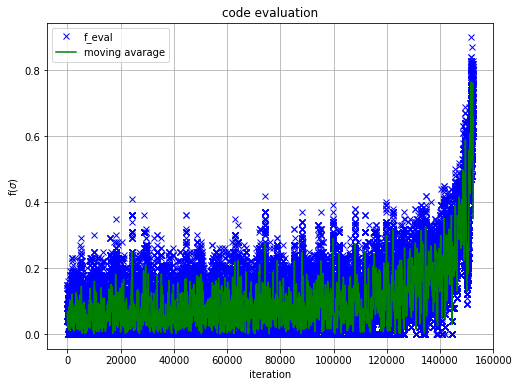

In [429]:
plot_optmization(f_hist)